In [1]:
import numpy as np
import sklearn
import pandas as pd

In [2]:
# Note: I've put the csv files in a folder called data
train = pd.read_csv("train.csv", index_col=0)
val = pd.read_csv("dev.csv", index_col=0)
test= pd.read_csv("test_no_label.csv",index_col=0)

In [112]:
test= pd.read_csv("test_no_label.csv",index_col=0)

In [3]:
train.shape

(15539, 2)

In [4]:
val.shape

(1316, 2)

In [5]:
train.head()

,labels,features
ex_id,,
0,"446,521,1149,1249,1265,1482",0:0.084556 1:0.138594 2:0.094304 3:0.195764 4:...
1,"78,80,85,86",0:0.050734 1:0.762265 2:0.754431 3:0.065255 4:...
2,"457,577,579,640,939,1158",0:0.101468 1:0.138594 2:0.377215 3:0.130509 4:...
3,"172,654,693,1704",0:0.186024 1:0.346484 2:0.141456 3:0.195764 4:...
4,"403,508,1017,1052,1731,3183",0:0.135290 1:0.277187 2:0.141456 3:0.065255 4:...


In [6]:
val.head()

,labels,features
ex_id,,
3,"105,897",0:0.118379 1:0.346484 2:0.424367 3:0.195764 4:...
6,"25,419,586,802,2200",0:0.084556 1:0.970155 2:0.471519 3:0.261019 4:...
8,"445,499,814,1135,1255,1943",0:0.050734 1:1.524530 2:2.027533 3:0.652547 5:...
11,"125,502,2167",0:0.118379 2:0.235760 3:0.065255 4:0.262522 7:...
12,"48,57,86,180",0:0.033823 1:0.103945 2:0.094304 3:0.195764 4:...


In [7]:
val = val[~val.labels.str.contains(":")]

In [8]:
train = train[~train.labels.str.contains(":")]

In [9]:
val.shape, train.shape

((1314, 2), (15511, 2))

# Remove broken label examples

In [10]:
labels_list = [label.split(" ") for label in train['labels']]
labels_list = [label[0].split(",") for label in labels_list]
labels_list_val = [label.split(" ") for label in val['labels']]
labels_list_val = [label[0].split(",") for label in labels_list_val]

In [11]:
# # drop the broken indices - found them using this - need to ask on Piazza what's wrong with them
# broken_indices = []
# for i in range(len(labels_list)):
#     for j in range(len(labels_list[i])):
#         try:
#             int(labels_list[i][j])   
#         except:
#             #print(i, labels_list[i])
#             broken_indices.append(i)

In [12]:
# # drop the broken indices - found them using this - need to ask on Piazza what's wrong with them
# broken_indices_val = []
# for i in range(len(labels_list_val)):
#     for j in range(len(labels_list_val[i])):
#         try:
#             int(labels_list_val[i][j])   
#         except:
#             #print(i, labels_list[i])
#             broken_indices_val.append(i)

In [13]:
# labels_array = np.array(labels_list)
# #labels_list = np.delete(labels_array, broken_indices).tolist()
# labels_array_val = np.array(labels_list_val)
# labels_list_val = np.delete(labels_array_val, broken_indices_val).tolist()

In [14]:
len(labels_list), len(labels_list_val)

(15511, 1314)

# Convert labels

In [15]:
labels_list = [[int(s) for s in sublist] for sublist in labels_list] 

In [16]:
labels_list_val = [[int(s) for s in sublist] for sublist in labels_list_val] 

In [17]:
labels_list[0:10]

[[446, 521, 1149, 1249, 1265, 1482],
 [78, 80, 85, 86],
 [457, 577, 579, 640, 939, 1158],
 [172, 654, 693, 1704],
 [403, 508, 1017, 1052, 1731, 3183],
 [174, 379, 380, 381, 449, 493, 677, 1328],
 [592, 595, 617, 694, 923],
 [446, 499, 500, 671, 804, 1210],
 [64, 180, 611],
 [505, 1098, 1310, 1818, 3263]]

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
class_list = [i for i in range(0,3993)]
mlb = MultiLabelBinarizer(classes=class_list)
encoded_labels = mlb.fit_transform(labels_list)

In [19]:
encoded_labels_val = mlb.fit_transform(labels_list_val)

In [20]:
encoded_labels_df_val = pd.DataFrame(encoded_labels_val, columns = class_list)
encoded_labels_df = pd.DataFrame(encoded_labels, columns = class_list)

In [21]:
encoded_labels_df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
encoded_labels_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert features

In [23]:
def make_dict(entry):
    # entry is a list with form ['id:value', 'id:value']
    col_dict = {}
    for word in entry:
        key, value = word.split(":")
        key = int(key)
        value = float(value)
        col_dict[key] = value
    return col_dict

In [24]:
# drop broken indices
train_df = train['features']
#train_df = train_df.drop(broken_indices, axis=0)
val_df = val['features']

In [114]:
test_df = test["features"]

In [25]:
train_df.shape, val_df.shape

((15511,), (1314,))

In [26]:
features = [item.split(" ") for item in train_df]
col_dicts = [make_dict(entry) for entry in features]

In [116]:
features_test = [item.split(" ") for item in test_df]
col_dicts_test = [make_dict(entry) for entry in features_test]

In [27]:
len(col_dicts)

15511

In [28]:
features_val = [item.split(" ") for item in val_df]
col_dicts_val = [make_dict(entry) for entry in features_val]

In [29]:
len(col_dicts_val)

1314

In [30]:
# Turn features column into sparse dataframe
# Note: missing values as NaN - should these be zeros?
features_df = pd.DataFrame(col_dicts)
features_df_val = pd.DataFrame(col_dicts_val)

In [117]:
features_df_test=pd.DataFrame(col_dicts_test)

In [31]:
features_df.shape

(15511, 5000)

In [32]:
features_df_val.shape

(1314, 5000)

In [33]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.084556,0.138594,0.094304,0.195764,0.612552,0.106491,0.137765,0.145839,0.304610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.050734,0.762265,0.754431,0.065255,0.350030,NaN,0.137765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.101468,0.138594,0.377215,0.130509,0.175015,0.745434,0.137765,1.020873,1.218441,0.309297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.186024,0.346484,0.141456,0.195764,0.262522,0.425962,0.551062,0.437517,0.609220,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.135290,0.277187,0.141456,0.065255,1.137597,0.106491,0.137765,0.583356,0.152305,0.154649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
features_df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.118379,0.346484,0.424367,0.195764,0.350030,0.212981,0.137765,0.145839,0.152305,0.309297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.084556,0.970155,0.471519,0.261019,0.350030,0.745434,0.275531,0.291678,1.675356,0.463946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.050734,1.524530,2.027533,0.652547,NaN,5.005057,0.137765,0.583356,3.503017,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.118379,NaN,0.235760,0.065255,0.262522,NaN,NaN,0.145839,0.609220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.033823,0.103945,0.094304,0.195764,0.175015,0.745434,0.137765,0.145839,0.304610,0.618594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CC and ECC implementation

In [35]:
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.svm import SVC

In [36]:
features_df = features_df.fillna(0)
features_df_val = features_df_val.fillna(0)

In [118]:
features_df_test=features_df_test.fillna(0)

In [121]:
x_test=np.array(features_df_test)

In [135]:
x_test.shape

(2489, 5000)

In [37]:
X_train = np.array(features_df)
Y_train = np.array(encoded_labels_df)
x_val = np.array(features_df_val)
y_val = np.array(encoded_labels_df_val)

In [38]:
X_train.shape

(15511, 5000)

In [39]:
x_val

array([[0.118379, 0.346484, 0.424367, ..., 0.      , 0.      , 0.      ],
       [0.084556, 0.970155, 0.471519, ..., 0.      , 0.      , 0.      ],
       [0.050734, 1.52453 , 2.027533, ..., 0.      , 0.      , 0.      ],
       ...,
       [0.033823, 0.20789 , 0.047152, ..., 0.      , 0.      , 0.      ],
       [0.050734, 0.20789 , 0.188608, ..., 0.      , 0.      , 0.      ],
       [0.050734, 0.381132, 0.282912, ..., 0.      , 0.      , 0.      ]])

In [40]:
y_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Linear Regression 

In [41]:
# from sklearn.linear_model import RidgeClassifierCV

In [42]:
# from warnings import simplefilter
# # ignore all future warnings
# simplefilter(action='ignore', category=FutureWarning)

In [100]:
cv = [15,None]
alphas=[(0.0001, 0.01, 0.1),(1.0,2.0,5.0),(0.1,1.0,10.0)]

In [44]:
# results =[]
# for i in cv:
#     for j in alphas:   
#         clf = RidgeClassifierCV(alphas=j,cv=i)
#         clf.fit(X_train,Y_train)
#         y_score = clf.decision_function(x_val)
#         precision =label_ranking_average_precision_score(y_val, y_score)
#         print(precision)
#         results.append(precision)

In [101]:
results=[0.505377872112244,0.5068242493202174,0.5068242493202174,0.5048943364851514,
         0.5063438610472137,0.5068242493202174]

In [102]:
df=pd.DataFrame(np.zeros((6,3)),columns=["cv","alphas","precision"])
cv[1]=X_train.shape[0]
k=0
for i in cv:
    for j in alphas:
        df.iloc[k]=[i,j,results[k]]
        k+=1
df

ValueError: setting an array element with a sequence.

In [47]:
import matplotlib.pyplot as plt

In [48]:
plt.plot(cv,df["precision"][df["alphas"]==(0.001,0.01,1.0)],label="Alphas=(0.001,0.1,1.0)")
plt.plot(cv,df["precision"][df["alphas"]==(1.0,5.0,10.0)],label="Alphas = (1.0,5.0,10.0)")
plt.plot(cv,df["precision"][df["alphas"]==(0.1,1.0,10.0)],label="Alphas = (0.1,1.0,10.0)")
plt.scatter(df["cv"][df["precision"]==np.max(results)].values[0],np.max(results),
            marker="x",label="Optimal Hyperparamter",color="black",s=70)
plt.xlabel("Number of Folds")
plt.ylabel("LRAP")
plt.grid()
plt.legend(loc="upper right")
plt.title("Linear Regression Hyperparameter Search")
plt.savefig("LR.png",dpi=1000)

## MLPClassifier

In [49]:
from sklearn.neural_network import MLPClassifier

In [85]:
layers=[(100, 100),(100, 100, 100),(500, 500),(500, 500, 500)]
lr =[0.001,0.0001]

In [75]:
results=[]
for i in layers:
    for j in lr:
        mlp = MLPClassifier(hidden_layer_sizes=i,learning_rate_init=j)
        mlp.fit(X_train,Y_train)
        y_score = mlp.predict_proba(x_val)
        precision =label_ranking_average_precision_score(y_val, y_score)
        print(precision,i,j)
        results.append(precision)

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [80]:
results =[0.5045284891401289, 0.5275503737306726 ,0.47188796479601425,0.4971045265759424,
          0.5583357163064533, 0.5790157598683956,0.5304811978491621,0.5660122417188499]

In [87]:
df=pd.DataFrame(np.zeros((8,3)),columns=["learning rate","layers","precision"])
layers=[str(i) for i in layers]
k=0
for i in layers:
    for j in lr:
        df.iloc[k]=[j,i,results[k]]
        k+=1
df

,learning rate,layers,precision
0,0.0010,"(100, 100)",0.504528
1,0.0001,"(100, 100)",0.527550
2,0.0010,"(100, 100, 100)",0.471888
3,0.0001,"(100, 100, 100)",0.497105
4,0.0010,"(500, 500)",0.558336
5,0.0001,"(500, 500)",0.579016
6,0.0010,"(500, 500, 500)",0.530481
7,0.0001,"(500, 500, 500)",0.566012


In [82]:
import matplotlib.pyplot as plt

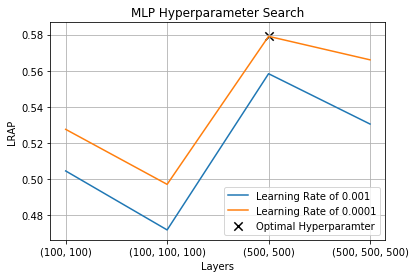

In [89]:
plt.plot(layers,df["precision"][df["learning rate"]==0.001],label="Learning Rate of 0.001")
plt.plot(layers,df["precision"][df["learning rate"]==0.0001],label="Learning Rate of 0.0001")
plt.scatter(df["layers"][df["precision"]==np.max(results)].values[0],np.max(results),
            marker="x",label="Optimal Hyperparamter",color="black",s=70)
plt.xlabel("Layers")
plt.ylabel("LRAP")
plt.grid()
plt.legend(loc="lower right")
plt.title("MLP Hyperparameter Search")
plt.savefig("MLP.png",dpi=1000)

## test set training

In [158]:
mlp = MLPClassifier(hidden_layer_sizes=(500,500),learning_rate_init=0.0001,max_iter=500)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 500), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [159]:
y_score = mlp.predict_proba(x_test)

In [160]:
scores=pd.DataFrame(y_score)

In [165]:
scores_round=scores.round(10)

In [166]:
scores_round.to_csv("predictions.csv",header=False, index=False)